In [6]:
import pandas as pd
import urllib # sirve para acceder a archivos de internet y descargarlos automaticamnete
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [7]:
# os me sirve para crear la ruta de los directorios, donde quiero descargar mi archivo
file_path = os.path.join("data", "covid") #nombro las carpetas

In [8]:
os.makedirs(file_path, exist_ok = True) #creacion de las carpetas

In [9]:
csv_path = os.path.join(file_path, 'data.csv') #decirle que guarde el nombre del archivo en la carpeta

In [ ]:
#urllib.request.urlretrieve('https://covid19.who.int/WHO-COVID-19-global-data.csv', csv_path) # descarga el archivo desde este link de internet

In [10]:
df = pd.read_csv(csv_path)

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [11]:
df2 = df[["Date_reported","Country","New_cases","Cumulative_cases","New_deaths","Cumulative_deaths"]]
df2

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,Afghanistan,0,0,0,0
1,2020-01-04,Afghanistan,0,0,0,0
2,2020-01-05,Afghanistan,0,0,0,0
3,2020-01-06,Afghanistan,0,0,0,0
4,2020-01-07,Afghanistan,0,0,0,0
...,...,...,...,...,...,...
132369,2021-07-12,Zimbabwe,912,67765,59,2185
132370,2021-07-13,Zimbabwe,2661,70426,51,2236
132371,2021-07-14,Zimbabwe,2845,73271,38,2274
132372,2021-07-15,Zimbabwe,3110,76381,58,2332


In [12]:
df2.isnull().sum()

Date_reported        0
Country              0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64

In [13]:
df4 = df2.groupby("Country").count()
df4#["Country"]

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Country,,,,,
Afghanistan,560,560,560,560,560
Albania,561,561,561,561,561
Algeria,561,561,561,561,561
American Samoa,561,561,561,561,561
Andorra,561,561,561,561,561
...,...,...,...,...,...
Wallis and Futuna,561,561,561,561,561
Yemen,560,560,560,560,560
Zambia,561,561,561,561,561


In [14]:
# https://www.statista.com/statistics/1195753/bitcoin-trading-selected-countries/
# https://triple-a.io/crypto-ownership/
#[Estados Unidos] [Rusia] [Nigeria] [China] [Reino Unido] [Colombia] 
#[Kenya] [Canada] [India] [Australia] [Argentina] [Peru] [Filipina] 
#[Tailandia] [Brazil] [Chile] [Mexico] [Suecia] [Ukrania] [Malasia] 
df3 = df2.loc[df2["Country"].isin(["United States of America","Russian Federation","Nigeria",
                                   "China","The United Kingdom","Colombia","Kenya","Canada",
                                   "India","Australia","Argentina","Peru","Philippines","Thailand",
                                   "Brazil","Chile","Mexico","Sweden","Ukraine","Malaysia"])]
df3 = df3.loc[df3["Cumulative_cases"]>0]
#df3["Country"].value_counts()

In [15]:
df3["Date_reported"] = pd.to_datetime(df3["Date_reported"])
#df3.info()
df3.head()

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
4547,2020-03-03,Argentina,5,5,0,0
4548,2020-03-04,Argentina,0,5,0,0
4549,2020-03-05,Argentina,0,5,0,0
4550,2020-03-06,Argentina,1,6,0,0
4551,2020-03-07,Argentina,7,13,1,1


In [16]:
btc = pd.read_csv("BTC-USD.csv")
btc

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,2.811148e+10
1,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,1.844427e+10
2,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,1.972507e+10
3,2020-01-06,7410.452148,7781.867188,7409.292969,7769.219238,7769.219238,2.327626e+10
4,2020-01-07,7768.682129,8178.215820,7768.227539,8163.692383,8163.692383,2.876729e+10
...,...,...,...,...,...,...,...
556,2021-07-12,34254.015625,34592.156250,32697.308594,33155.847656,33155.847656,2.432150e+10
557,2021-07-13,33125.468750,33327.101563,32261.419922,32702.025391,32702.025391,1.912086e+10
558,2021-07-14,32723.845703,33061.398438,31639.125000,32822.347656,32822.347656,2.137653e+10
559,2021-07-15,32827.875000,33159.640625,31175.708984,31780.730469,31780.730469,2.130052e+10


In [17]:
Bitcoin = pd.read_csv("BTC-USD.csv")
Bitcoin["Average"] = Bitcoin["High"]/2 + Bitcoin["Low"]/2
Bitcoin["Average"] = Bitcoin["Average"].round(2)
Bitcoin["Date"] = pd.to_datetime(Bitcoin["Date"])
Bitcoin['Volume'] = Bitcoin['Volume']/1000000000
bit = Bitcoin[["Date","Average","Volume"]]
#bit1 = Bitcoin.loc[Bitcoin["Date"]<"01/01/2021"]
#bit2 = Bitcoin.loc[Bitcoin["Date"]>"31/12/2020"]
#bit2
#bit1
#bit.info()

In [18]:
bit.isnull().sum()

Date       0
Average    4
Volume     4
dtype: int64

In [19]:
Bitcoin.isnull().sum()

Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
Average      4
dtype: int64

In [21]:
bit[bit.isnull()["Average"]]

,Date,Average,Volume
105,2020-04-17,NaN,NaN
280,2020-10-09,NaN,NaN
283,2020-10-12,NaN,NaN
284,2020-10-13,NaN,NaN


In [22]:
bit.loc[105,"Average"] = bit.loc[104,"Average"]*0.5 + bit.loc[106,"Average"]*0.5
bit.loc[105,"Volume"] = bit.loc[104,"Volume"]*0.5 + bit.loc[106,"Volume"]*0.5

C:\Users\Jimmy Leon\anaconda3\lib\site-packages\pandas\core\indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [23]:
bit.loc[105,"Average"]

7012.29

In [24]:
bit.loc[280,"Average"] = bit.loc[279,"Average"]*0.5 + bit.loc[281,"Average"]*0.5
bit.loc[280,"Volume"] = bit.loc[279,"Volume"]*0.5 + bit.loc[281,"Volume"]*0.5

In [25]:
bit.loc[283,"Average"] = bit.loc[282,"Average"]*0.5 + bit.loc[285,"Average"]*0.5
bit.loc[283,"Volume"] = bit.loc[282,"Volume"]*0.5 + bit.loc[285,"Volume"]*0.5

In [26]:
bit.loc[284,"Average"] = bit.loc[283,"Average"]*0.5 + bit.loc[285,"Average"]*0.5
bit.loc[284,"Volume"] = bit.loc[283,"Volume"]*0.5 + bit.loc[285,"Volume"]*0.5

In [ ]:
bit.loc[280,"Average"]

In [ ]:
bit.loc[283,"Average"]

In [ ]:
bit.loc[284,"Average"]

In [ ]:
bit.loc[105]

In [ ]:
bit

In [27]:
max = bit["Volume"].idxmax()
bit.loc[max]
bit.describe()

,Average,Volume
count,561.000000,561.000000
mean,22907.252745,41.293945
std,17496.896904,22.970084
min,4972.550000,12.252601
25%,9349.920000,25.921805
50%,11732.120000,37.071460
75%,35464.210000,51.287443
max,63208.950000,350.967941


In [28]:
min = bit["Volume"].idxmin()
bit.loc[min]

Date       2020-07-18 00:00:00
Average            9165.900000
Volume               12.252601
Name: 197, dtype: object

In [ ]:
#bit1 = Bitcoin.loc[Bitcoin["Date"]<"01/01/2021"]
#bit2 = Bitcoin.loc[Bitcoin["Date"]>"31/12/2020"]

In [ ]:
plt.figure(figsize = (10,10))
sns.lineplot(x = 'Date', y = 'Average',data = bit1)

In [ ]:
plt.figure(figsize = (10,10))
sns.lineplot(x = 'Date', y = 'Average',data = bit2)

<AxesSubplot:xlabel='Date', ylabel='Average'>

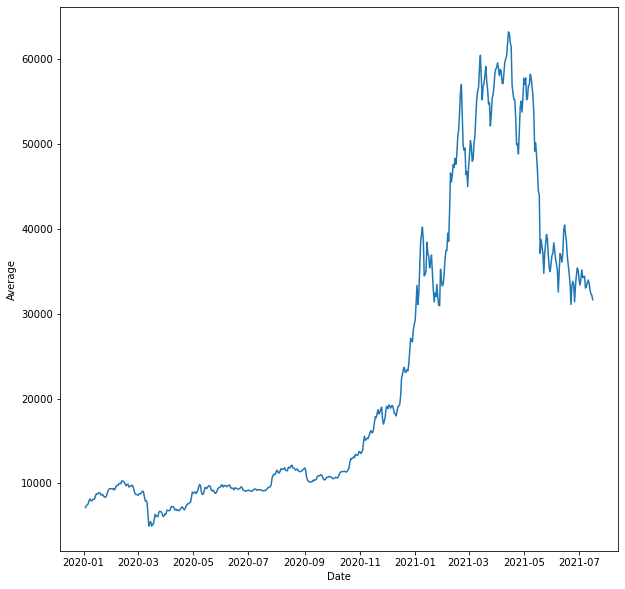

In [29]:
plt.figure(figsize = (10,10))
sns.lineplot(x = 'Date', y = 'Average',data = Bitcoin)

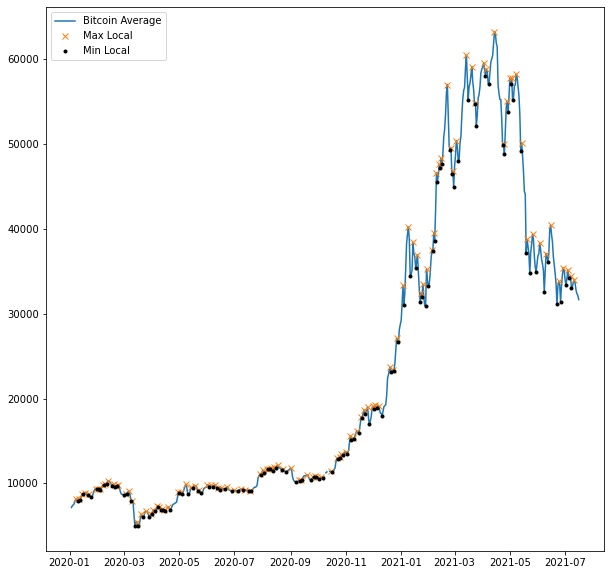

In [32]:
bit1 = bit.loc[bit["Date"]<"30/06/2020"]

bit2 = bit1.loc[bit1["Date"]>"31/03/2020"]

y = bit["Average"]
x = bit["Date"]
peaks, _ = find_peaks(y)
min_, _ = find_peaks(-y)

# this way the x-axis corresponds to the index of x
plt.figure(figsize = (10,10))
plt.plot(x, y,label='Bitcoin Average')
plt.plot(x.loc[peaks], y[peaks], "x",label='Max Local')
plt.plot(x.loc[min_], y[min_], "o",c="black",markersize=3,label='Min Local')
plt.legend()
plt.show()


In [ ]:
bit1 = bit.loc[bit["Date"]<"30/06/2020"]
y = bit1["Average"]
x = bit1["Date"]
max_, _ = find_peaks(y)
min_, _ = find_peaks(-y)

# this way the x-axis corresponds to the index of x
plt.figure(figsize = (10,10))
plt.plot(x, y,label='Bitcoin Average')
plt.plot(x.loc[max_], y[max_], "x",c="red",markersize=10,label='Max Local')
plt.plot(x.loc[min_], y[min_], "o",c="black",markersize=3,label='Min Local')
plt.legend()
plt.show()




In [ ]:
y2 = bit1["Volume"]
x2 = bit1["Date"]
max_2, _ = find_peaks(y)
min_2, _ = find_peaks(-y)
plt.figure(figsize = (10,10))
plt.plot(x2, y2,label='Bitcoin Volume')
plt.plot(x2.loc[max_2], y2[max_2], "x",c="red",markersize=10,label='Max Local')
plt.plot(x2.loc[min_2], y2[min_2], "o",c="black",markersize=3,label='Min Local')
plt.legend()
plt.show()

In [ ]:
peaks, _ = find_peaks(y)
x = bit["Date"]
new = x.loc[peaks]
new

In [33]:
Paises = df3[["Date_reported","New_cases","Cumulative_cases","New_deaths","Cumulative_deaths"]].groupby("Date_reported").sum()
Paises.reset_index(inplace=True)
paises1 = Paises.loc[Paises["Date_reported"]<"01/01/2021"]
paises2 = Paises.loc[Paises["Date_reported"]>"31/12/2020"]
#paises1
#paises2
#Paises

In [ ]:
plt.figure(figsize = (15,15))
sns.lineplot(x = 'Date_reported', y = 'New_cases',data = paises1)

In [ ]:
plt.figure(figsize = (15,15))
sns.lineplot(x = 'Date_reported', y = 'New_cases',data = paises2)

<AxesSubplot:xlabel='Date_reported', ylabel='New_cases'>

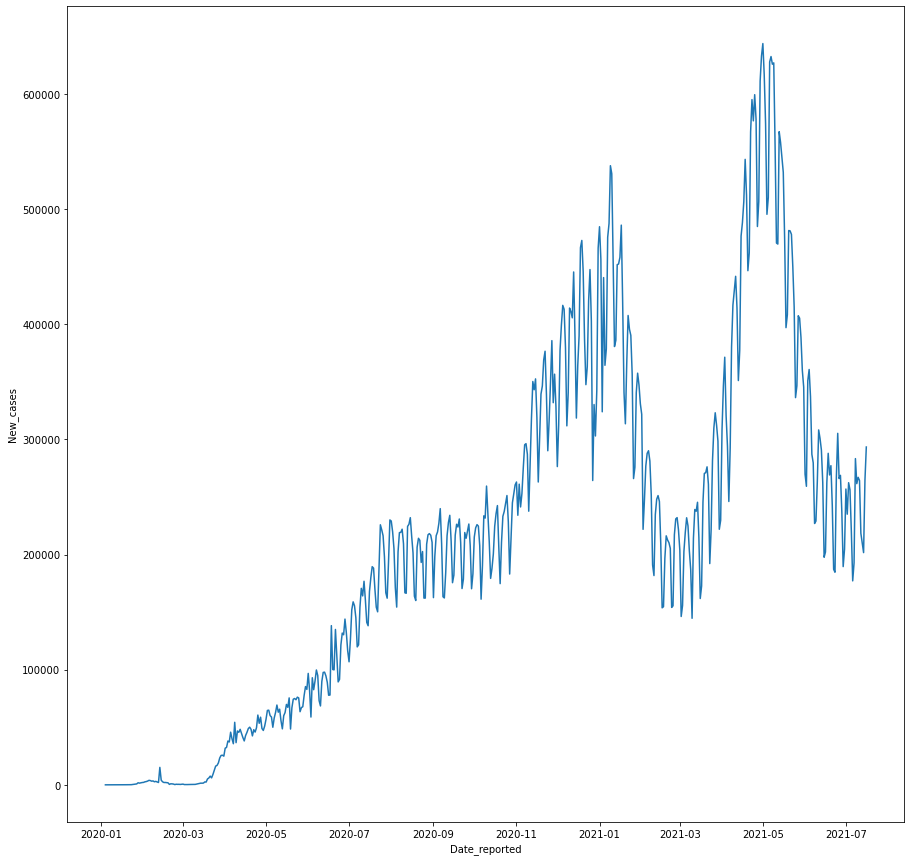

In [34]:
plt.figure(figsize = (15,15))
sns.lineplot(x = 'Date_reported', y = 'New_cases',data = Paises)

In [ ]:
plt.figure(figsize = (15,15))
sns.lineplot(x = 'Date_reported', y = 'Cumulative_cases',data = Paises)

In [ ]:
United_State = df3.query("Country=='United States of America'")
max = United_State["New_cases"].idxmax()
United_State.loc[max]
Rusia = df3.query("Country=='United States of America'")

In [ ]:
plt.figure(figsize = (15,15))

def minmax_norm_Pais(df):
    return (df["New_cases"] - df["New_cases"].min()) / ( df["New_cases"].max() - df["New_cases"].min())

def minmax_norm_Bitcoin(df):
    return (df["Average"] - df["Average"].min()) / ( df["Average"].max() - df["Average"].min())

bitc=minmax_norm_Bitcoin(bit)
US2 =minmax_norm_Pais(United_State)
y = bitc
x = bit["Date"]
plt.plot(x, y,label='Bitcoin Average')
y = US2
x = United_State["Date_reported"]
plt.plot(x, y,label='Covid New Cases')
plt.legend()
#sns.lineplot(x = 'Date_reported', y = 'New_cases',data = United_State)

In [39]:
max_i = bit["Volume"].idxmax()
max_i
bit.loc[420,"Volume"] = bit.loc[419,"Volume"]*0.5 + bit.loc[421,"Volume"]*0.5

C:\Users\Jimmy Leon\anaconda3\lib\site-packages\pandas\core\indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


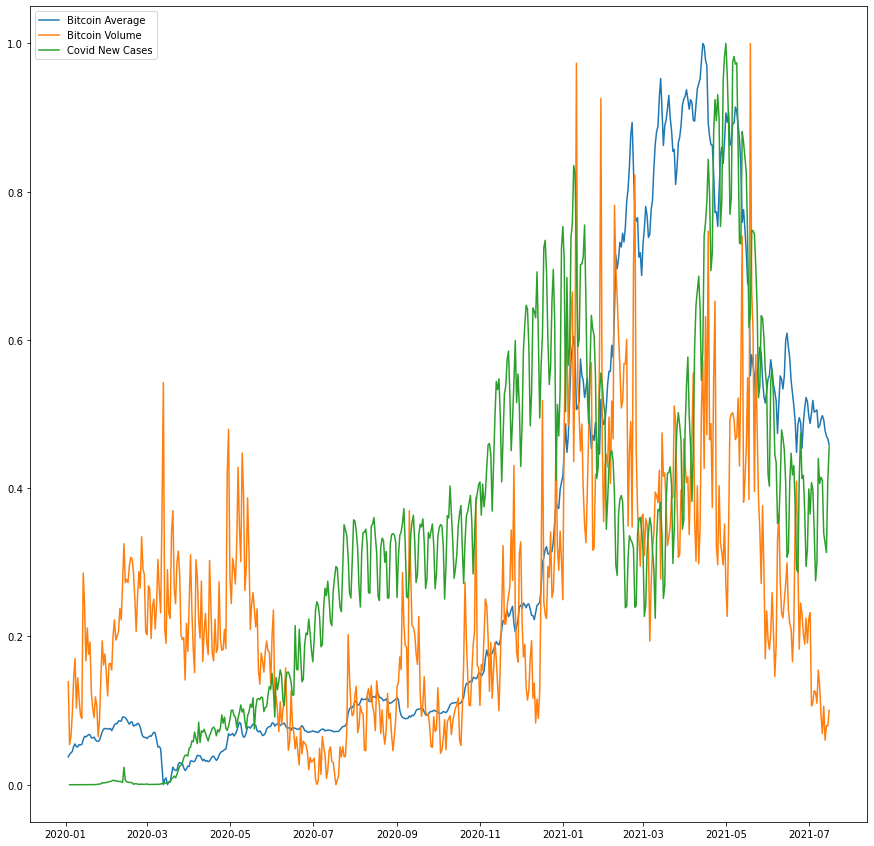

In [41]:
plt.figure(figsize = (15,15))

def minmax_norm_Pais(df):
    return (df["New_cases"] - df["New_cases"].min()) / ( df["New_cases"].max() - df["New_cases"].min())

def minmax_norm_Bitcoin(df):
    return (df["Average"] - df["Average"].min()) / ( df["Average"].max() - df["Average"].min())

def minmax_norm_Bitcoin2(df):
    return (df["Volume"] - df["Volume"].min()) / ( df["Volume"].max() - df["Volume"].min())

bitc=minmax_norm_Bitcoin(bit)
bitc2=minmax_norm_Bitcoin2(bit)
US2 =minmax_norm_Pais(Paises)

y = bitc
x = bit["Date"]
plt.plot(x, y,label='Bitcoin Average')
y = bitc2
x = bit["Date"]
plt.plot(x, y,label='Bitcoin Volume')
y = US2
x = Paises["Date_reported"]
plt.plot(x, y,label='Covid New Cases')
plt.legend()

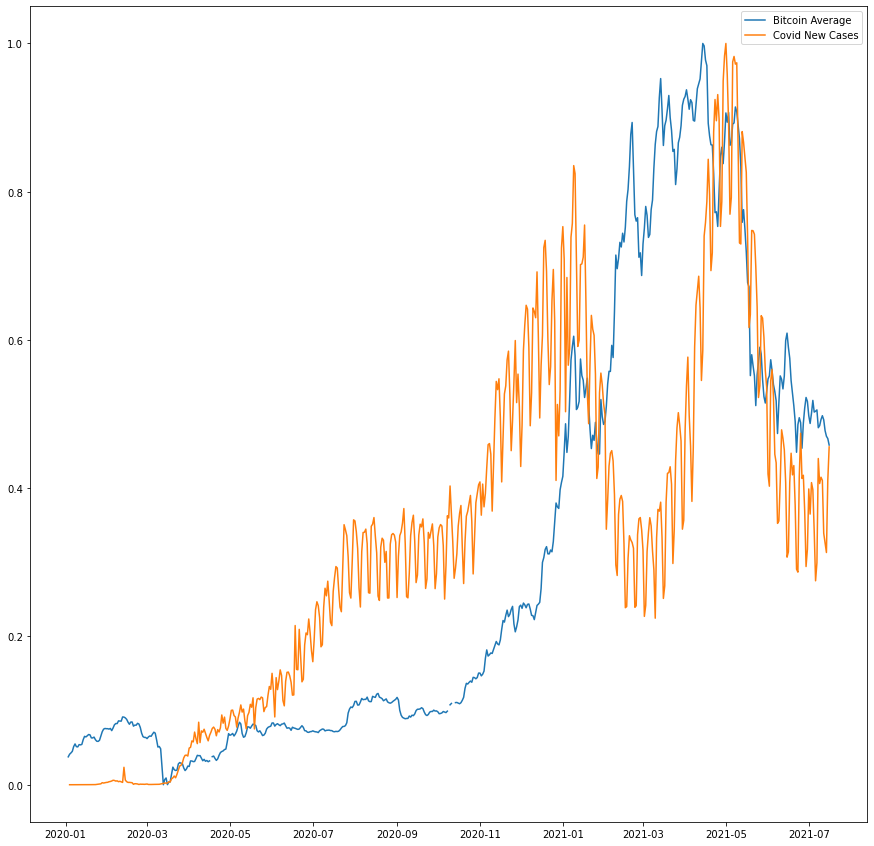

In [35]:
plt.figure(figsize = (15,15))

def minmax_norm_Pais(df):
    return (df["New_cases"] - df["New_cases"].min()) / ( df["New_cases"].max() - df["New_cases"].min())

def minmax_norm_Bitcoin(df):
    return (df["Average"] - df["Average"].min()) / ( df["Average"].max() - df["Average"].min())

bitc=minmax_norm_Bitcoin(bit)
US2 =minmax_norm_Pais(Paises)
y = bitc
x = bit["Date"]
plt.plot(x, y,label='Bitcoin Average')
y = US2
x = Paises["Date_reported"]
plt.plot(x, y,label='Covid New Cases')
plt.legend()

In [ ]:
plt.figure(figsize = (15,15))

def minmax_norm_Pais(df):
    return (df["New_cases"] - df["New_cases"].min()) / ( df["New_cases"].max() - df["New_cases"].min())

def minmax_norm_Bitcoin(df):
    return (df["Volume"] - df["Volume"].min()) / ( df["Volume"].max() - df["Volume"].min())

bitc=minmax_norm_Bitcoin(bit)
US2 =minmax_norm_Pais(Paises)
y = bitc
x = bit["Date"]
plt.plot(x, y,label='Bitcoin Volume')
y = US2
x = Paises["Date_reported"]
plt.plot(x, y,label='Covid New Cases')
plt.legend()

In [ ]:
max_i = bit["Volume"].idxmax()
bit.loc[max_i]

In [ ]:
max_i = bit["Volume"].idxmax()
Bitcoin2=bit.loc[bit.index!=max_i]

plt.figure(figsize = (15,15))

def minmax_norm_Pais(df):
    return (df["New_cases"] - df["New_cases"].min()) / ( df["New_cases"].max() - df["New_cases"].min())

def minmax_norm_Bitcoin(df):
    return (df["Volume"] - df["Volume"].min()) / ( df["Volume"].max() - df["Volume"].min())

bitc=minmax_norm_Bitcoin(Bitcoin2)
US2 =minmax_norm_Pais(Paises)
y = bitc
x = Bitcoin2["Date"]
plt.plot(x, y,label='Bitcoin Volume')
y = US2
x = Paises["Date_reported"]
plt.plot(x, y,label='Covid New Cases')
plt.legend()

In [ ]:

max_i = bit["Volume"].idxmax()
Bitcoin2=bit.loc[bit.index!=max_i]

plt.figure(figsize = (15,15))

def minmax_norm_Pais(df):
    return (df["Cumulative_cases"] - df["Cumulative_cases"].min()) / ( df["Cumulative_cases"].max() - df["Cumulative_cases"].min())

def minmax_norm_Bitcoin(df):
    return (df["Volume"] - df["Volume"].min()) / ( df["Volume"].max() - df["Volume"].min())

bitc=minmax_norm_Bitcoin(Bitcoin2)
US2 =minmax_norm_Pais(Paises)
y = bitc
x = Bitcoin2["Date"]
plt.plot(x, y)
y = US2
x = Paises["Date_reported"]
plt.plot(x, y)

In [ ]:
def add_weekday(row):
    if(row["Date"].dayofweek<5):
        return 0
    else:
        return 1
Bitcoin["isWeekEnd"] = Bitcoin.apply(add_weekday,axis=1)   
Bitcoin

In [ ]:
max_i = Bitcoin["Volume"].idxmax()
Bitcoin2=Bitcoin.loc[Bitcoin.index!=max_i]

plt.figure(figsize = (3,5))

sns.boxplot(y="Volume",data = Bitcoin)

In [ ]:
df3


#sns.boxplot(x="Country",y="New_cases",data = df3)
sns.catplot(y="New_cases",data = df3, kind="box", col="Country", col_wrap=2)

In [ ]:
plt.figure(figsize = (15,15))
sns.lineplot(x= "Date_reported",y = 'New_cases',data = df3)

In [ ]:
plt.figure(figsize = (15,15))
sns.lineplot(x = 'Date_reported', y = 'New_cases',data = Paises)

In [ ]:
'''
1.- ¿Cual es la realacion que existe entre la pandemia del Covid y la bolsa de valores del Bitcoin (con respecto al volumen)?
2.- ¿Cual es la realacion que existe entre la pandemia del Covid y la bolsa de valores del Bitcoin (con respecto al valor)?
3.- ¿Cuales son las caracteriscas mas influyentes para esta correlacion?
'''

In [ ]:
df_index = df3.index

In [ ]:
df_index #aqui solo retorna el objeto el valor inicial y el fin de los indices del dataframe

In [ ]:
df3.columns

In [ ]:
df_index.values #convertir en un array los valores de los indices

In [ ]:
df3.values #toma los valores del dataframe pero no toma los indices ni las columnas y lo transforma en una matriz tipo numpy

In [ ]:
df3.dtypes #tipo de clase es cada columna

In [ ]:
df3.info() #info mas detallada del dataframe

In [ ]:
df3.describe() #estadisticas del dataframe